### Travel Insurance Dataset
The data is about how frequent people travel, do they suffer from any Chronic Disease and do they have a travel insurance and other personal details.

## Importing all the necessary libraries

In [65]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing the data

In [66]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


## Removing Un-necessary Columns

In [67]:
df.drop(columns = 'Unnamed: 0',axis = 1,inplace = True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [68]:
df.shape

(1987, 9)

## Checking for null values if any

In [69]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

<AxesSubplot:>

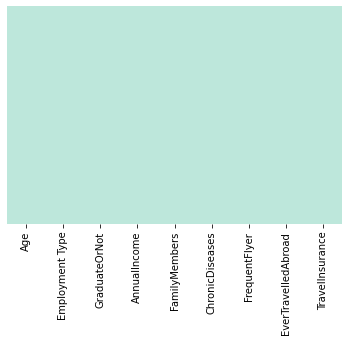

In [70]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False, cmap='icefire')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


**TravelInsurance is a target column rest all are features column**

In [72]:
df['TravelInsurance'].value_counts() 

0    1277
1     710
Name: TravelInsurance, dtype: int64

**This is an imbalanced data so we need to balance it out before model selection and after encoding.**

In [73]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


<AxesSubplot:xlabel='Age', ylabel='Density'>

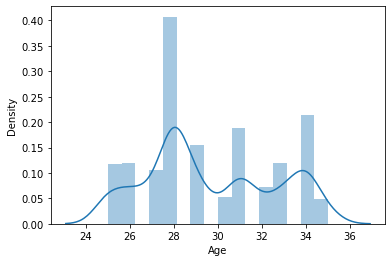

In [74]:
sns.distplot(df.Age)
# Maximum people are of the age 28

<AxesSubplot:xlabel='AnnualIncome', ylabel='Density'>

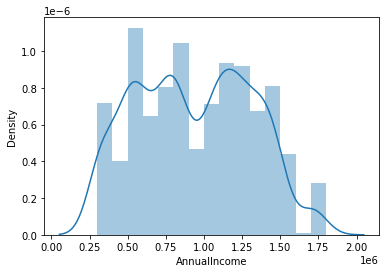

In [75]:
sns.distplot(df.AnnualIncome)
# Maximum People have their annual income in the range of 0.5 and 1.4 million

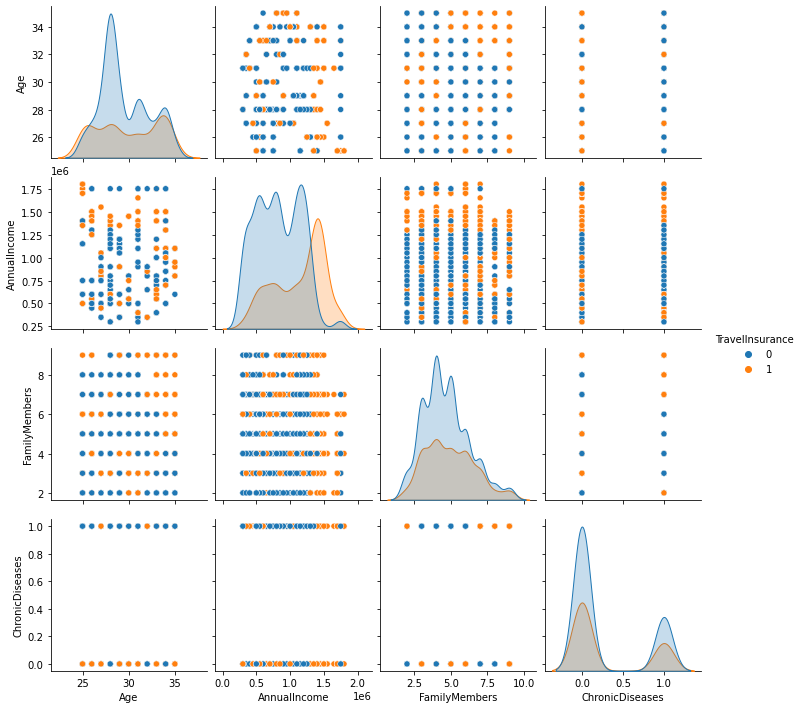

In [76]:
sns.pairplot(df,hue='TravelInsurance')
#This Pairplot Indicates that it is a binary classification problem

<AxesSubplot:xlabel='AnnualIncome'>

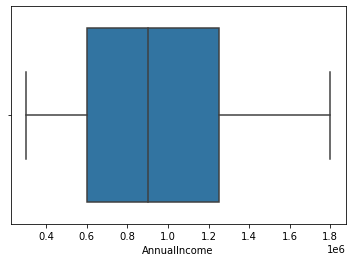

In [77]:
sns.boxplot(df.AnnualIncome, hue =df['TravelInsurance'])

In [78]:
#There are no outliers in the dataset

## Encoding

In [79]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [80]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [81]:
#Encoding 
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
x[['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']] = oe.fit_transform(x[['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']])

In [82]:
x

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0.0,1.0,400000,6,1,0.0,0.0
1,31,1.0,1.0,1250000,7,0,0.0,0.0
2,34,1.0,1.0,500000,4,1,0.0,0.0
3,28,1.0,1.0,700000,3,1,0.0,0.0
4,28,1.0,1.0,700000,8,1,1.0,0.0
...,...,...,...,...,...,...,...,...
1982,33,1.0,1.0,1500000,4,0,1.0,1.0
1983,28,1.0,1.0,1750000,5,1,0.0,1.0
1984,28,1.0,1.0,1150000,6,1,0.0,0.0
1985,34,1.0,1.0,1000000,6,0,1.0,1.0


## Balancing The Imbalanced Data

In [83]:
!pip install imbalanced-learn

In [84]:
from imblearn.over_sampling import SMOTE

In [85]:
s = SMOTE()
X_smote , Y_smote = s.fit_resample(x,y)

In [86]:
x_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(Y_smote)
y_smote.iloc[:,0].value_counts()

0    1277
1    1277
Name: TravelInsurance, dtype: int64

In [87]:
x_smote

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,31,0.0,1.0,400000,6,1,0.0,0.0
1,31,1.0,1.0,1250000,7,0,0.0,0.0
2,34,1.0,1.0,500000,4,1,0.0,0.0
3,28,1.0,1.0,700000,3,1,0.0,0.0
4,28,1.0,1.0,700000,8,1,1.0,0.0
...,...,...,...,...,...,...,...,...
2549,26,0.0,1.0,1450000,3,0,1.0,1.0
2550,25,1.0,0.0,1150000,5,0,0.0,0.0
2551,34,1.0,1.0,1500000,3,0,1.0,1.0
2552,26,0.0,1.0,1450000,4,0,1.0,1.0


# Model Selection and Model Building

In [88]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_smote,y_smote,test_size=.25,random_state=1)

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
def models(model):
    model = model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    print(f'Train Accuracy :{train}\nTest Accuracy :{test}')
    print(classification_report(ytest,pred))
    return model

In [118]:
models(LogisticRegression())

Train Accuracy :0.6412532637075719
Test Accuracy :0.6776212832550861
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       326
           1       0.67      0.66      0.67       313

    accuracy                           0.68       639
   macro avg       0.68      0.68      0.68       639
weighted avg       0.68      0.68      0.68       639



LogisticRegression()

In [119]:
models(BernoulliNB())

Train Accuracy :0.6960835509138381
Test Accuracy :0.6995305164319249
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       326
           1       0.77      0.55      0.64       313

    accuracy                           0.70       639
   macro avg       0.72      0.70      0.69       639
weighted avg       0.72      0.70      0.69       639



BernoulliNB()

In [120]:
models(SVC())

Train Accuracy :0.6997389033942559
Test Accuracy :0.7261345852895149
              precision    recall  f1-score   support

           0       0.67      0.90      0.77       326
           1       0.84      0.54      0.66       313

    accuracy                           0.73       639
   macro avg       0.76      0.72      0.72       639
weighted avg       0.76      0.73      0.72       639



SVC()

In [121]:
models(KNeighborsClassifier())

Train Accuracy :0.8428198433420365
Test Accuracy :0.7730829420970265
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       326
           1       0.77      0.76      0.77       313

    accuracy                           0.77       639
   macro avg       0.77      0.77      0.77       639
weighted avg       0.77      0.77      0.77       639



KNeighborsClassifier()

### Hyper Parameter Tuning for SVC

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
params = {
    'C':[0.1,1,10],
    'gamma': [0.1,0.01,0.001],
    'kernel':['rbf']
}

In [124]:
grid = GridSearchCV(SVC(),param_grid=params,verbose =2)
grid

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [125]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.001,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [126]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [127]:
models(SVC(C = 1,gamma=0.1,kernel ='rbf'))

Train Accuracy :0.8161879895561358
Test Accuracy :0.7652582159624414
              precision    recall  f1-score   support

           0       0.72      0.88      0.79       326
           1       0.84      0.65      0.73       313

    accuracy                           0.77       639
   macro avg       0.78      0.76      0.76       639
weighted avg       0.78      0.77      0.76       639



SVC(C=1, gamma=0.1)

### Hyper Parameter Tuning for KNN

In [128]:
testac =[]
trainac = []
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train = knn.score(xtrain,ytrain)
    test = knn.score(xtest,ytest)
    
    trainac.append(train)
    testac.append(test)

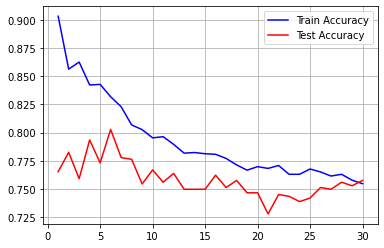

In [129]:
plt.plot(range(1,31),trainac,color = 'b', label = "Train Accuracy")
plt.plot(range(1,31),testac,color = 'r',label = "Test Accuracy")
plt.grid()
plt.legend()

In [130]:
models(KNeighborsClassifier(n_neighbors=29))

Train Accuracy :0.7577023498694517
Test Accuracy :0.7527386541471048
              precision    recall  f1-score   support

           0       0.71      0.86      0.78       326
           1       0.82      0.64      0.72       313

    accuracy                           0.75       639
   macro avg       0.76      0.75      0.75       639
weighted avg       0.76      0.75      0.75       639



KNeighborsClassifier(n_neighbors=29)

**Conclusion**: For this Project we will use the KNN Model as it gives us the best accuracy. 